# Motivation #

Consider a system where the interaction between light (electromagnetic field) and matter is sufficiently strong that the molecular spectrum is significantly affected by this interaction. One way to achieve this is by confining the electromagnetic field in a small space. As we will see in following sections, this can be understood by recognizing the dependence of the light-matter interaction strength ("coupling constant") on the so-called quantization volume. Experimentally, this condition has been achieved within microcavities, where light is trapped between two high-quality mirrors separated by a short distance enhancing its interaction with molecules inside it. In the most typical microcavity (see figure below), the mirrors are planar and the cavity length (distance between the two mirrors) is on the same scale as an infrared or visible photon wavelength. This length dictates which radiation modes can be supported by the microcavity (in the same way the geometry of a musical instrument determines the sound waves emitted by the device).

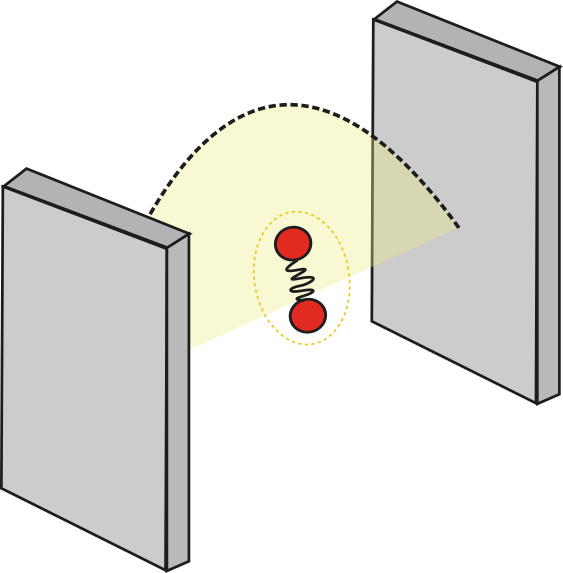




In this tutorial, we will build an idealized Hamiltonian that can be used to model the energetics and dynamics of systems where the coupling of light and matter is sufficiently strong that hybridization occurs between states of light and matter and new 'orbitals' are formed just as strongly interacting atoms form new (molecular) orbitals via hybridization of the corresponding atomic orbitals.

# 0. Introduction #

This notebook aims to give step-by-step construction of the two simplest models of strong light-matter interaction: the single molecule Jaynes-Cummings model and the multi-molecule Tavis-Cumming model. These models describe:

- Matter: represented by two-level system, for example, the two levels could be the electronic ground and first excited state of a molecule, or alternatively the two levels could be the ground and first excited vibrational states ($\nu = 0$ and $\nu = 1$) of a particular vibrational mode. For concreteness, we will consider below the case where each matter mode is a harmonic oscillator.

- Light: also a two-level system corresponding to two states: the vacuum state $|0\rangle$ and the state $|1\rangle$ corresponding to a single photon inside the microcavity.

- Light-matter interactions: this is described in the electrical dipole approximation, that is, light drives transitions between ground and excited-states of matter through the interaction of the electric field of light with the electrical dipole moment of the molecular system.


You will need numpy and matplotlib for this project.

In [ ]:
from tqdm import tqdm

import numpy as np
import sympy as sm
import matplotlib.pyplot as plt

import scipy.constants as CONST

# 1. Second quantization

To get to our idealized Hamiltonian for our model, we must first be reminded of (or learn for the first time) second quantization formalism. Second quantization uses special ladder operators known as creation ($\hat{a}^{†}$) and annihilation ($\hat{a}$) operators that raise and lower (respectively) the state acted on by one quantum of energy.

The [creation and annihilation operators](https://en.wikipedia.org/wiki/Creation_and_annihilation_operators) are defined as follows:

\begin{align*}
  \hat{a}^† &= \sqrt{\frac{mω}{2ħ}} \hat{x} - \frac{i}{\sqrt{2mħω}} \hat{p}
\end{align*}

\begin{align*}
  \hat{a} &= \sqrt{\frac{mω}{2ħ}} \hat{x} + \frac{i}{\sqrt{2mħω}} \hat{p}
\end{align*}



For example, when a harmonic oscillator wave function is acted upon by the creation operator, the resulting state is simply the wave function that is shifted up in energy by $ħω$. The annihilation operator does the reverse, and when acting on the same wave function, will result in the wave function $ħω$ lower in energy.

- Optional: prove that these definitions of the creation and annihilation operators do move you up and down by one quantum of energy when acting on a harmonic oscillator type wave function (this is not necessary for our purposes, but it can be insightful if you have never seen second quantization before).

This formalism allows us to write our wave function in a special form known as a Fock state, or a number state, in which the state is represented by a number. For example, $|0⟩$ would represent the ground state, $|1⟩$ would be the first excited state, and so on. This greatly simplifies bookkeeping, and we will see this formalism come up again and again.



In second quantization formalism, the quantum harmonic oscillator is given by the following Hamiltonian:
\begin{align*}
    H = \hbar \omega \hat{a}^\dagger \hat{a}
\end{align*}

Where $\hbar$ and $\omega$ are the reduced Planck constant and frequency of the harmonic oscillator, respectively. Given $|n\rangle$ is the state of the harmonic oscillator with quantum number $n$, the effect of operators $\hat{a}, \hat{a}^\dagger$ on it will be:
\begin{align*}
    \hat{a} |n\rangle &= \begin{cases}
        \sqrt{n} |n-1\rangle, \qquad n \neq 0 \\
        0, \qquad\qquad\qquad n = 0 \\
    \end{cases}
    \\
    \hat{a}^\dagger |n\rangle &= \begin{cases}
        \sqrt{n+1} |n+1\rangle, \qquad n < N \\
        0, \qquad\qquad\qquad\qquad n = N \\
    \end{cases}
\end{align*}

where $N$ is the upper limit of quantum number $n$. Notice that lowering the ground state destroys the state, and likewise raising the highest energy state in a finite-dimensional Hilbert space will also destroy it.





To get an understanding of this, consider the two-level system with state $|0\rangle$ and $|1\rangle$ (N=1 in this case) represented as follows:
\begin{align*}
    |0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} ;\;
    |1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\end{align*}
How do you construct the matrix represent operator $\hat{a}, \hat{a}^\dagger$? Demonstrate your answer by perform `matmul` with `ket0` and `ket1` that are states $|0\rangle$ and $|1\rangle$.

In [ ]:
ket0 = np.array([1,0])
ket1 = np.array([0,1])

### Type your code here ###


# 2. Kronecker product

Another useful notation to understand is the Kronecker product.

Let's say that we have two system A and B with their separate Hilbert spaces. To describe the system that consists of A and B coupled together, the combined Hilbert space can be obtained by using a [Kronecker product](https://en.wikipedia.org/wiki/Kronecker_product) (see wikipedia page for the formula). That is, if $|n\rangle_A$, $|m\rangle_B$ are state ket of A and B, the state ket of the coupling system will be:
\begin{align*}
    |nm\rangle = |n\rangle_A \otimes |m\rangle_B
\end{align*}

The operator in a coupled system for A and B subsystem, i.e. $\hat{a}_A, \hat{a}_B$, can also be obtained by:
\begin{align*}
    \hat{a}_A &= \hat{a} \otimes \hat{I}
    \\
    \hat{a}_B &= \hat{I} \otimes \hat{a}
\end{align*}
where $\hat{I}$ is the identity operator.

Using the two system model as before, construct and print out the four states $|00\rangle, |10\rangle, |01\rangle, |11\rangle$ and store in variable `ket00, ket10, ket01, ket11`. [Hint](https://numpy.org/doc/2.1/reference/generated/numpy.kron.html)

In [ ]:
ket0_A = np.array([1,0])
ket1_A = np.array([0,1])
ket0_B = np.array([1,0])
ket1_B = np.array([0,1])

### Type your code here ###


### PRINT ###

print('|00> = ',ket00)
print('|10> = ',ket10)
print('|01> = ',ket01)
print('|11> = ',ket11)

## Next, construct $\hat{a}_A,\hat{a}_B, \hat{a}_A^\dagger, \hat{a}_B^\dagger$.
Store the matrix in variable `a_A, a_B, aT_A, aT_B` and run test below to see the effect of these operators on the state kets.

In [ ]:
### Type your code here ###


In [ ]:
### Sanity Test ###

print('a_A |00> = a_B |00> = ', np.matmul(a_A, ket00), '=', np.matmul(a_B, ket00))
print('a_A |10> = a_B |01> = ', np.matmul(a_A, ket10), '=', np.matmul(a_B, ket01))
print('a_A |01> = a_B |10> = ', np.matmul(a_A, ket01), '=', np.matmul(a_B, ket10))
print('a_A |11> = ', np.matmul(a_A, ket11))
print('a_B |11> = ', np.matmul(a_B, ket11))

print('---------------------------------------------------')

print('aT_A |11> = aT_B |11> = ', np.matmul(aT_A, ket11), '=', np.matmul(aT_B, ket11))
print('aT_A |10> = aT_B |01> = ', np.matmul(aT_A, ket10), '=', np.matmul(aT_B, ket01))
print('aT_A |01> = aT_B |10> = ', np.matmul(aT_A, ket01), '=', np.matmul(aT_B, ket10))
print('aT_A |00> = ', np.matmul(aT_A, ket00))
print('aT_B |00> = ', np.matmul(aT_B, ket00))

print('---------------------------------------------------')
print('aT_A aT_B|00> = ', np.matmul(aT_B,np.matmul(aT_A, ket00)))
print('a_A a_B |11> = ', np.matmul(a_B,np.matmul(a_A, ket11)))

- What is important is that the Kronecker product formalism allows us to compactly write combined states for larger systems. For example, if we had a system of three molecules, $A, B,$ and $C$, we could simply write the state as $| n_A, n_B, n_C ⟩$, where $n_x$ gives the occupation number of state $x$. This is extremely useful when describing large states involving many molecules (and/or photon modes).

# 3. Jaynes - Cummings model

Now we can finally bring it all together, and can arrive at one of the simplest models for understanding strong light-matter interactions, the [Jaynes-Cumming model (see Eq. 2 in this paper)](https://pubs.acs.org/doi/10.1021/acs.chemrev.2c00855?ref=PDF)

 As stated before, this model describe the coupling between the matter and light, both are described as harmonic oscillators. Let the Hamiltonian for the light and matter be (ignoring zero-point vibrational energy):
\begin{align*}
    H_L &= \hbar \omega_k \hat{a}_k^\dagger \hat{a}_k
    \\
    H_M &= \hbar \omega_m \hat{\sigma}_m^\dagger \hat{\sigma}_m
\end{align*}

where $\hat{\sigma}_m, \hat{\sigma}_m^\dagger$ are matter exciton creation and annihilation operator, while $\hat{a}_k, \hat{a}_k^\dagger$ are creation and annihiltion of the photon with wavevector $\boldsymbol{k}$ (so that its frequency will be $c|\boldsymbol{k}|$ with speed of light $c$).

For simplicity, we restrict the matter description to a two-level system, meaning that the molecules are either in the ground ($|0⟩$) or excited ($|1⟩$) state.

With [rotating wave approximation](https://github.com/RibeiroGroup/Tutorials/blob/main/2_RabiOscillations/b_rwa_analytical.md) and ignoring the spatial dependence of the field (the typical molecule is much smaller than the wavelength of visible or infrared light, and therefore, the electric field magnitude is essentially constant over a molecule), the interaction part of the Hamiltonian will be:
\begin{align*}
    H_{LM} = g (\hat{a}_k \sigma^\dagger_m + \hat{a}_k^\dagger \sigma_m)
\end{align*}

with $g$ is the positive scalar expressed the magnitude of the light matter coupling.

- For a detailed explanation of these terms, please see the [tutorial](https://github.com/RibeiroGroup/Tutorials/blob/main/3_TavisCummings/instructions.md) on our group's GitHub. The instructions explicitly give the quantum formalism for matter, the quantum formalism for light, and the light-matter interaction, which is worth looking at before continuing.

Still under the two-level assumption for light and matter, construct the total Hamiltonian $H_{JC} = H_M + H_L + H_{LM}$ below. You may use `sympy` symbols to create a matrix contain symbols, instead of number.

In [ ]:
g = sm.symbols('g')
hbar = sm.symbols('hbar')
wk = sm.symbols('omega_k')
wm = sm.symbols('omega_m')

### Type your code here - You may have some matrices to defined ###


def jaynes_cummings(wm, wk, g, hbar = 1):
    ### Type your code here, defined H_M, H_L, and H_LM ###


### Visualizing the symbolic matrix
sm.Matrix(jaynes_cummings(wm,wk,g,hbar))

### Rabi splitting

In our approximate treatment, the uncoupled system (e.g. $g = 0$) has four energy levels. However, under coupling $g > 0$, only **two levels couple with each other**, while the other two do not.

*Question*

Can you point out which levels are coupled from the Hamiltonian?

Assume that the system is in resonance $\omega_k = \omega_m$, the two aforementioned energy levels would be degenerate. Under strong coupling, the spectrum will show no such degeneracy as the two degenerate levels hybridize, and the two resulting energy levels are split apart.

The lower energy state is be called the **Lower Polariton** (LP), while the higher energy state is called the **Upper Polariton** (UP). The energy gap between this two states is known as **Rabi splitting**, which is observed in experiments through spectroscopy.

Let $\omega_m = \omega_k = 1000 cm^{-1}$ and $g = 20 cm^{-1}$. Compute the energy level of the system and the Rabi splitting. You may use the function to convert frequency from $cm^{-1}$ to atomic unit.

In [ ]:
def convert_wn(wn):
    Eh,_,_ = CONST.physical_constants['Hartree energy']
    return (CONST.c * 10**2) * wn * CONST.h / Eh

def to_cm(wn):
    Eh,_,_ = CONST.physical_constants['Hartree energy']
    return wn / ((CONST.c * 10**2) * CONST.h / Eh)

### Type your code here ###


### The Rabi splitting also depend on the detuning $\delta = |\omega_k - \omega_m|$. Plot the gap for different detuning value.

In [ ]:
### Type your code below ###


# 4. Tavis - Cummings model

The Tavis-Cummings model extends the Jaynes-Cummings model with the inclusion of more than one molecule, as seen in the aforementioned [tutorial](https://github.com/RibeiroGroup/Tutorials/blob/main/3_TavisCummings/instructions.md). The Tavis-Cumming Hamiltonian reads:
\begin{align*}
    H_{TC} = \sum_{m=1}^{N} \hbar \omega_m \hat{\sigma}_m^\dagger \hat{\sigma}_m
    + \hbar \omega_m \hat{a}_k^\dagger \hat{a}_k
    + \sum_{m=1}^N g (a_k \hat{\sigma}_m^\dagger + a_k^\dagger \hat{\sigma}_m)
\end{align*}

You may implement this model by simply repeating the procedure for the Jaynes-Cumming model. However, the Kronecker product may inflate the Hamiltonian matrix with redundant rows/columns. Fortunately, the Hamiltonian matrix for TC can be inferred from examining the pattern in the JC matrix above.  

Write the Hamiltonian matrix for TC model with $N = 3$ and all molecules has the same frequency $\omega_m$ in the markdown cell below.  

Some key assumptions to keep in mind for this model:
- The molecules do not interact among themselves.
- All molecules have the same coupling strength with the radiation mode
($g$)
.
- All molecules are described by a two-level system with uniform excitation energy ($ħω_m$)
- For our case, we are only interested in the case where there is only one photon available for absorption, so using basis vectors of $|n,m⟩$, where $n$ is the photon and $m$ denotes the molecule, we can shrink our basis to only include the relevant states:

\begin{align*}
  |n,m⟩ = |1,0⟩ |0, a⟩ |0,b⟩ |0,c⟩ ...
\end{align*}
- Therefore, a system with $N$ molecules results in an $(N+1)$x $(N+1)$ Hamiltonian matrix. As a convention, we shall use our first basis element as the one where the photon is free and no molecule is excited.

Write a Python function to construct the Hamiltonian matrix for $\omega_m = \omega_k = 1000 cm^{-1}$ and $g = 20 cm^{-1}$.

*Questions:*

What is your observation of the energy levels?

Are there symmetries that can be exploited?

If there is simpler way to represent the system, what would it be, and can you get an analytical formulations for the energy splitting?

### Write your Hamiltonian matrix here


In [ ]:
# Type your code here - 
# Write a function to construct and diagonalize the Tavis-Cummings Hamiltonian


### Plot the highest and lowest frequencies and the gap between them as a function of $N\in (1,900)$

In [ ]:
# Type your code here


### N
Is there a way to express the gap between UP and LP as a simple function of N? Type your answer below in this very same markdown cell.

# 5. Further exploration
You have reached the end of the tutorial, here is some of the potential extended tasks that you can further explore to develop additional insight and intuition on effective light-matter Hamiltonians:

- List and explain the reasoning for all assumptions involved in our construction of the Hamiltonian, quantum states and in solving for the energy levels. Under what conditiions, are these assumtpions expected to break down

- Implement the Hamiltonian without the rotating wave approximation and including spatial dependent. You might want to take a lot at more complex Quantum Electrodynamics theory in [e.g., this paper https://pubs.acs.org/doi/10.1021/acs.chemrev.2c00855?ref=PDF]
- Implement time-dependent dynamics of the system
- Implement multimode cavity
- Implement disorder in positions, molecular orientation and transition energy

